In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


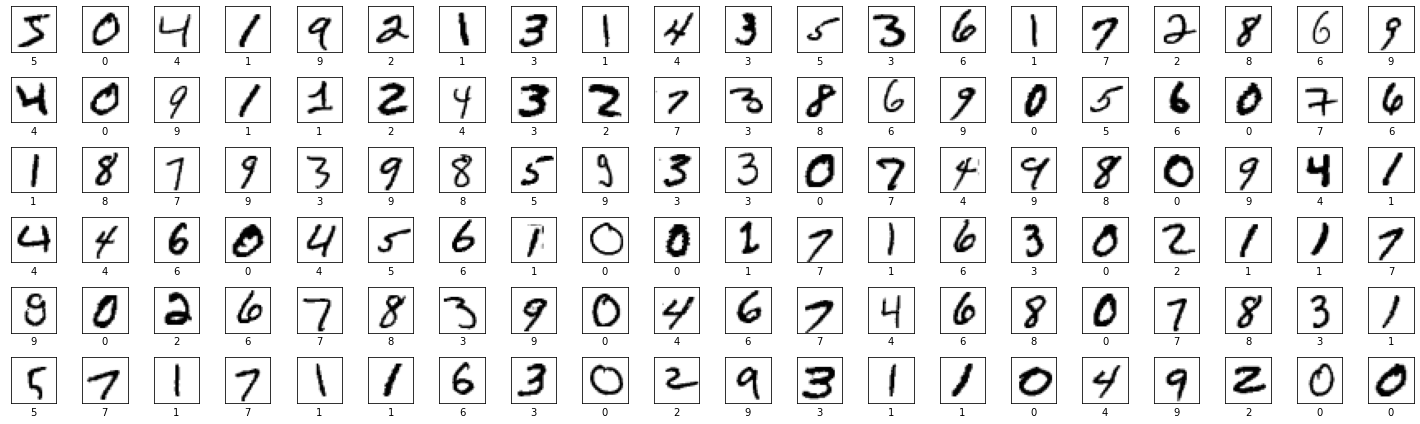

In [4]:

ROWS = 6
COLS = 20
i = 0
plt.figure(figsize=(20,6))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [7]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=38)

Epoch 1/5
1264/1264 [==============================] - 48s 38ms/step - loss: 0.2438 - accuracy: 0.9235 - val_loss: 0.0973 - val_accuracy: 0.9720
Epoch 2/5
1264/1264 [==============================] - 47s 37ms/step - loss: 0.0764 - accuracy: 0.9763 - val_loss: 0.0840 - val_accuracy: 0.9755
Epoch 3/5
1264/1264 [==============================] - 48s 38ms/step - loss: 0.0526 - accuracy: 0.9840 - val_loss: 0.0644 - val_accuracy: 0.9829
Epoch 4/5
1264/1264 [==============================] - 47s 37ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.0492 - val_accuracy: 0.9862
Epoch 5/5
1264/1264 [==============================] - 47s 37ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0432 - val_accuracy: 0.9882


In [9]:
model.compile(
   optimizer='RMSProp', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [10]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=38)

Epoch 1/5
1264/1264 [==============================] - 47s 37ms/step - loss: 0.0262 - accuracy: 0.9910 - val_loss: 0.0608 - val_accuracy: 0.9860
Epoch 2/5
1264/1264 [==============================] - 47s 37ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0591 - val_accuracy: 0.9863
Epoch 3/5
1264/1264 [==============================] - 47s 37ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0613 - val_accuracy: 0.9874
Epoch 4/5
1264/1264 [==============================] - 48s 38ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.0584 - val_accuracy: 0.9893
Epoch 5/5
1264/1264 [==============================] - 48s 38ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0662 - val_accuracy: 0.9868


In [11]:
model.compile(
   optimizer='SGD', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [12]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=38)

Epoch 1/5
1264/1264 [==============================] - 48s 38ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0500 - val_accuracy: 0.9898
Epoch 2/5
1264/1264 [==============================] - 47s 37ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0491 - val_accuracy: 0.9908
Epoch 3/5
1264/1264 [==============================] - 46s 37ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0467 - val_accuracy: 0.9908
Epoch 4/5
1264/1264 [==============================] - 46s 36ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0479 - val_accuracy: 0.9910
Epoch 5/5
1264/1264 [==============================] - 47s 37ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0481 - val_accuracy: 0.9911


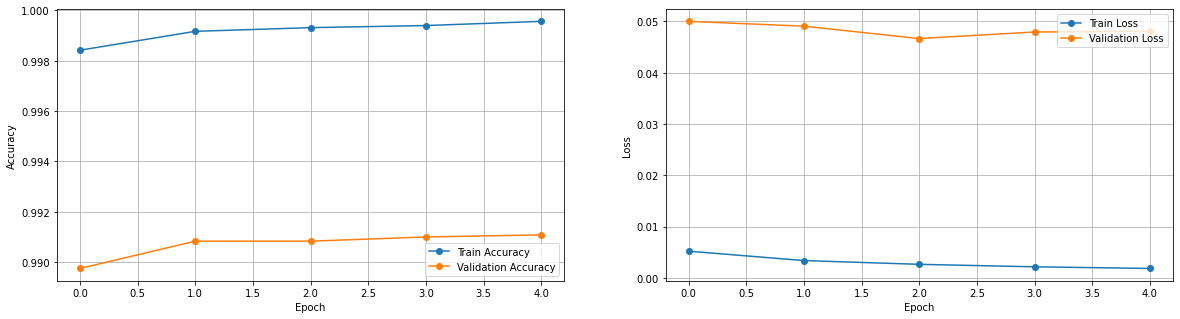

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], 'o-', label='Train Loss')
plt.plot(h.history['val_loss'], 'o-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [15]:

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 0.0348 - accuracy: 0.9923

Test Accuracy: 0.9922999739646912

Test Loss: 0.03480652719736099
